#  Gaming platforms trend for 2017

### Goal
To identify patterns of success in games in order to select potentially popular products and correctly plan advertising campaigns

### Contents

1. General information
2. Data processing 
3. Exploratory data analysis
4. User profiles for each region
5. Hypothesis testing
6. Conclusion and recommendations

##  Общая информация

In [2]:
import pandas as pd
import numpy as np
import math
!pip install -U seaborn
import seaborn as sns
sns.set_style(style='darkgrid')
import matplotlib.pyplot as plt
import random
from scipy import stats as st
import warnings
warnings.simplefilter('ignore')

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 1.1 MB/s eta 0:00:01


In [3]:
df = pd.read_csv("/datasets/games.csv")

In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.columns = map(str.lower, df.columns)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


As the number of string 'tbd' is quite substantial - about 2500 values, let's fill them with -1, so that the user score does not take these -1 values into account, and for the rest of variables the values remain untouched

In [7]:
cnt = 0
for i in range(len(df)):
    if df['user_score'].loc[i] == 'tbd':
        cnt += 1

print(cnt)

2424


In [8]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')
df['user_score'] = df['user_score'].replace('tbd',-1) 
df['user_score'] = df['user_score'].astype('float')
df.info()                                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


In [9]:
def print_hist(column, name):
    x = df[column]

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(x,ax=ax_box).set_title(name)
    sns.distplot(x, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    #sns.title(name)

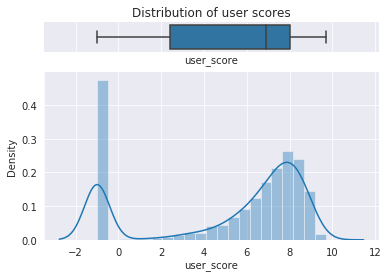

In [10]:
print_hist('user_score', 'Distribution of user scores')

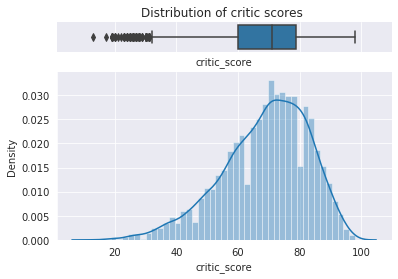

In [11]:
print_hist('critic_score', 'Distribution of critic scores ');

## Handling NaNs

1. It is necessary to reset the values with missing names, since their number is insignificant - this will not affect the quality of the analysis;
2. A significant number of NaNs are present in important variables for analysis, such as score, user score, rating. Due to the fact that there are duplicates in ds by name (the same games for different platforms), you can assign their values by name to those positions where there are none and look at the result.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


In [52]:
ds_p_y = df.pivot_table(index='year_of_release',values=['name','critic_score'],aggfunc=['count'])
ds_p_y['ratio'] = ds_p_y['count']['critic_score'] / ds_p_y['count']['name'] 
ds_p_y.sort_values('ratio',ascending=False)

count           ratio
                critic_score  name          
year_of_release                             
2002                     652   838  0.778043
2003                     608   783  0.776501
2004                     581   764  0.760471
2005                     683   945  0.722751
2001                     341   484  0.704545
2006                     640  1015  0.630542
2007                     720  1202  0.599002
2013                     316   546  0.578755
2014                     336   581  0.578313
2012                     363   661  0.549168
2008                     779  1439  0.541348
2016                     261   502  0.519920
2009                     714  1426  0.500701
2015                     301   606  0.496700
2011                     538  1147  0.469050
2010                     562  1268  0.443218
2000                     151   351  0.430199
1985                       2    14  0.142857
1999                      45   339  0.132743
1980                       1     9  0.111111
1992                       4    43  0.093023
1994                      11   121  0.090909
1997                      23   289  0.079585
1998                      30   379  0.079156
1988                       1    15  0.066667
1990                       1    16  0.062500
1989                       1    17  0.058824
1996                      10   263  0.038023
1982                       1    36  0.027778
1995                       6   219  0.027397
1981                       1    46  0.021739
1993                       1    60  0.016667
1991                       0    41  0.000000
1987                       0    16  0.000000
1986                       0    21  0.000000
1984                       0    14  0.000000
1983                       0    17  0.000000

In [53]:
ds_p_y = df.pivot_table(index='year_of_release',values=['platform','critic_score'],aggfunc=['count'])
ds_p_y['ratio'] = ds_p_y['count']['critic_score'] / ds_p_y['count']['platform'] 
ds_p_y.sort_values('ratio',ascending=False)

count              ratio
                critic_score platform          
year_of_release                                
2002                     652      838  0.778043
2003                     608      783  0.776501
2004                     581      764  0.760471
2005                     683      945  0.722751
2001                     341      484  0.704545
2006                     640     1015  0.630542
2007                     720     1202  0.599002
2013                     316      546  0.578755
2014                     336      581  0.578313
2012                     363      661  0.549168
2008                     779     1439  0.541348
2016                     261      502  0.519920
2009                     714     1426  0.500701
2015                     301      606  0.496700
2011                     538     1147  0.469050
2010                     562     1268  0.443218
2000                     151      351  0.430199
1985                       2       14  0.142857
1999                      45      339  0.132743
1980                       1        9  0.111111
1992                       4       43  0.093023
1994                      11      121  0.090909
1997                      23      289  0.079585
1998                      30      379  0.079156
1988                       1       15  0.066667
1990                       1       16  0.062500
1989                       1       17  0.058824
1996                      10      263  0.038023
1982                       1       36  0.027778
1995                       6      219  0.027397
1981                       1       46  0.021739
1993                       1       60  0.016667
1991                       0       41  0.000000
1987                       0       16  0.000000
1986                       0       21  0.000000
1984                       0       14  0.000000
1983                       0       17  0.000000

As we can see from obtained data, the most popular and recent type of platforms have a large share of critics' reviews. Thus, we can assume that critics pay less attention to less popular platforms, which means that their lack of reviews is a normal phenomenon and not a mistake.

We leave the NaN values intact for the following reasons:

1. Any fill-in is artificially derived data, and it strongly affects descriptive statistics, which can lead to incorrect statistical test results.

2. By default, pandas library methods ignore omissions, so if no fill-in is planned, it is better to leave it as is. Otherwise, the results of the calculations will be very different from reality.

Let's check the distribution graphs, after replacing them with duplicate values.

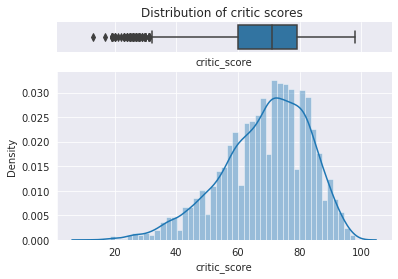

In [18]:
print_hist('critic_score','Distribution of critic scores ');

## Exploratory data analysis

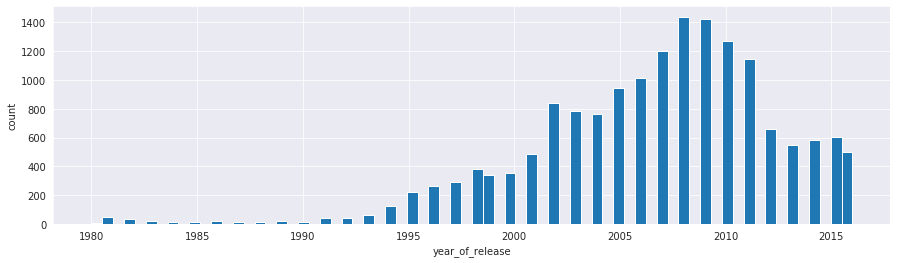

In [19]:
plt.figure(figsize=(15,4))

df['year_of_release'].hist(range=(min(df['year_of_release']),max(df['year_of_release'])),bins=70)
plt.xlabel('year_of_release')
plt.ylabel('count')
plt.show()

As one can see from the distribution point, most of the games were released in the period from 1995 to 2016 + we understand that the games that were released before 1995 are not relevant for our study, as since that moment the platforms capabilities and player preferences have changed significantly, I suggest excluding games before 1995 for further analysis. With this conversion we will lose a small fraction of the df, and we find that the early data have a significant amount of omissions

In [20]:
df.query('year_of_release > 1995').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,15828.000000,15828.000000,15828.000000,15828.000000,15828.000000,8654.000000,10153.000000
mean,2007.183915,0.252143,0.146815,0.064786,0.048681,68.915415,5.169743
std,4.856945,0.718972,0.510813,0.277351,0.190879,14.047558,3.713803
min,1996.000000,0.000000,0.000000,0.000000,0.000000,13.000000,-1.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,60.000000,2.500000
50%,2008.000000,0.080000,0.020000,0.000000,0.010000,71.000000,6.900000
75%,2011.000000,0.230000,0.110000,0.030000,0.040000,79.000000,8.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
ds_good = df.query('year_of_release > 1995')
ds_good.pivot_table(index=('platform'),values='total_sales',aggfunc='sum').sort_values('total_sales',ascending=False).head(10)

,total_sales
platform,
PS2,1244.20
X360,964.99
PS3,934.23
Wii,902.42
DS,804.09
PS,685.59
PS4,314.14
GBA,313.06
PSP,292.70


Выделим пять нынешних лидеров:

In [22]:
ds_good = ds_good.query('year_of_release >= 2014')
ds_good.pivot_table(index=('platform'),values='total_sales',aggfunc='sum').sort_values('total_sales',ascending=False).head(7)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05


In [99]:
platforms = df['platform'].unique()
ds_good.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,duplicated,total_sales,platform_category,genre_category
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,True,14.63,PS4,Shooter
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,True,12.62,PS4,other
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,False,11.68,3DS,Role-Playing
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,True,8.58,PS4,Sports
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,True,7.98,PS4,Shooter


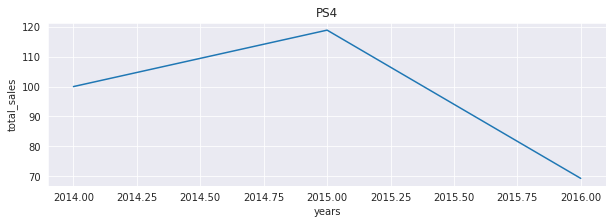

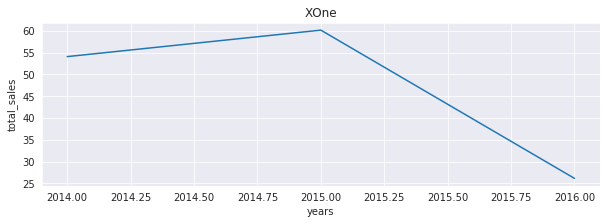

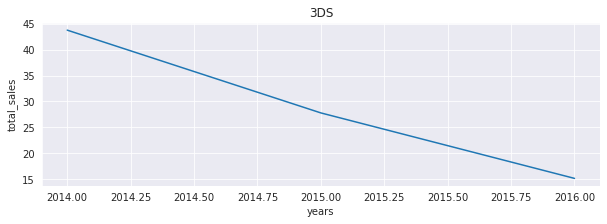

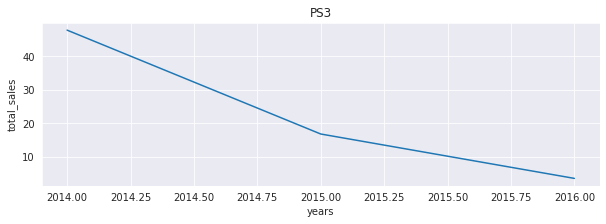

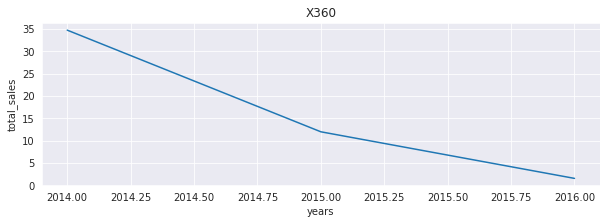

In [24]:
ds_platform_new = ds_good.pivot_table(index=('platform','year_of_release'),values='total_sales',aggfunc='sum')
ds_platform_group_new = pd.DataFrame(ds_platform_new.to_records())
ds_platform_index_new = ds_platform_group_new.set_index(['platform','year_of_release']).sort_index()

def platform_plot_new(platform):
    data = ds_platform_index_new.loc[platform]
    plt.plot(data.index, data.values)

platforms_new = ['PS4', 'XOne', '3DS', 'PS3', 'X360']

for platform in platforms_new:
    plt.figure(figsize = (10, 3))
    platform_plot_new(platform)
    plt.xlabel('years')
    plt.ylabel('total_sales')
    plt.title(platform)
    plt.show()

In [141]:
ds_platform_new1 = ds_good.pivot_table(index=('platform'),
                                       values=['year_of_release','total_sales'],aggfunc='sum').sort_values('total_sales',ascending=False)
ds_platform_new1

,total_sales,year_of_release
platform,,
PS4,288.15,757729
XOne,140.36,459446
3DS,86.68,427146
PS3,68.18,441215
X360,48.22,223615
WiiU,42.98,147078
PC,27.05,304272
PSV,22.40,594410
Wii,5.07,22160


,count,mean,median,sum
platform,,,,
3DS,212,0.408868,0.090,86.68
PS3,219,0.311324,0.110,68.18
PS4,376,0.766356,0.185,288.15
X360,111,0.434414,0.180,48.22
XOne,228,0.615614,0.205,140.36


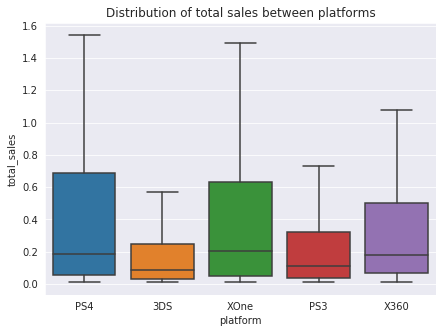

In [25]:
plt.figure(figsize = (7, 5))
ax = sns.boxplot(x="platform", y="total_sales", data=ds_good.query('platform in ("PS4","XOne","3DS", "PS3", "X360")'),showfliers = False)
plt.title('Distribution of total sales between platforms')

ds_good.query('platform in ("PS4","XOne","3DS", "PS3", "X360")').pivot_table(index='platform',values='total_sales',aggfunc=('mean','sum','count','median'))

Conclusion on sales trends by platform:


Obviously, the data during 2016 is incomplete. For example, the most popular platforms PS4 and XOne show a negative slope, the reason being, for instance,an unclosed fiscal year.

### Analysis of the impact of user feedback and critics

Text(0.5, 1.08, 'Your Title')

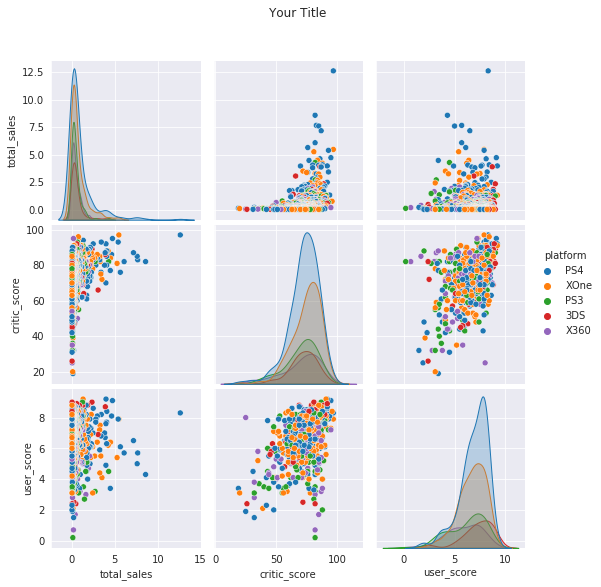

In [26]:
ds_good_stat = (
    ds_good.loc[:,['platform', 'total_sales', 'critic_score','user_score']]
    .query('critic_score>0 and user_score>0')
)

g = sns.pairplot(ds_good_stat.query('platform in ("PS4","XOne","3DS","PS3", "X360")'), hue='platform')
g.fig.suptitle("Your Title", y=1.08)

In [27]:
ds_good_stat.query('platform == "PS4"').corr(method='spearman').head(1)

,total_sales,critic_score,user_score
total_sales,1.0,0.518168,0.019531


In [28]:
ds_good_stat.query('platform == "XOne"').corr(method='spearman').head(1)

,total_sales,critic_score,user_score
total_sales,1.0,0.481602,-0.131082


In [29]:
ds_good_stat.query('platform == "3DS"').corr(method='spearman').head(1)

,total_sales,critic_score,user_score
total_sales,1.0,0.29854,0.211263


In [30]:
ds_good_stat.query('platform == "PS3"').corr(method='spearman').head(1)

,total_sales,critic_score,user_score
total_sales,1.0,0.474042,-0.017362


In [31]:
ds_good_stat.query('platform == "X360"').corr(method='spearman').head(1)

,total_sales,critic_score,user_score
total_sales,1.0,0.405579,0.013483


Conclusion on the distribution of sales across platforms:

Based on the scatter charts and correlation results, we can conclude that the influence of critics' reviews has an average impact on sales volumes. It was not possible to find a correlation between user reviews and sales because the charts clearly show that fairly average games according to gamers can have fairly high sales and vice versa.

### Анализ распределения игр по жанрам

In [32]:
ds_good.pivot_table(index='genre',values='total_sales',
                    aggfunc=('sum','count','mean','median')).sort_values('sum',ascending=False)

,count,mean,median,sum
genre,,,,
Action,619,0.322068,0.090,199.36
Shooter,128,1.335469,0.515,170.94
Sports,161,0.680000,0.180,109.48
Role-Playing,221,0.459005,0.110,101.44
Misc,113,0.332301,0.090,37.55
Fighting,60,0.470333,0.125,28.22
Racing,69,0.398841,0.090,27.52
Platform,38,0.476053,0.140,18.09
Adventure,185,0.094865,0.030,17.55


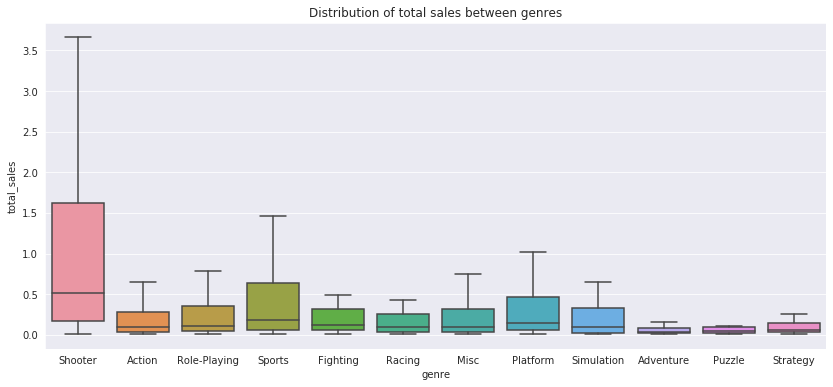

In [33]:
plt.figure(figsize = (14, 6))
ax = sns.boxplot(x="genre", y="total_sales", data=ds_good,showfliers = False)
plt.title('Distribution of total sales between genres');

Most commercially profitable genres are Shooter, Sports, Platform, since the median, average and distribution in general indicate that games in these genres usually have a good commercial success. As for the Action genre, it is not so clear-cut, there are a huge number of games in this genre, which means that the competition is higher and the average/median values are on a lower level.

Obvious outsiders are such genres as adventure, strategy and puzzle

## User portraits by region

### Top 5 platforms by region NA, EU, JP

In [88]:
region_sales = ['na_sales','eu_sales','jp_sales']
for reg_sale in region_sales:
    sales_by_region = ds_good.pivot_table(index='platform',values = reg_sale,aggfunc='sum').sort_values(by=reg_sale,ascending=False).head(5)
    print(sales_by_region)

          na_sales
platform          
PS4          98.61
XOne         81.27
X360         28.30
3DS          22.64
PS3          22.05
          eu_sales
platform          
PS4         130.04
XOne         46.25
PS3          25.54
PC           17.97
3DS          16.12
          jp_sales
platform          
3DS          44.24
PS4          15.02
PSV          14.54
PS3          11.22
WiiU          7.31


In [35]:
region_sales = ['na_sales','eu_sales','jp_sales']
l = []
for reg_sale in region_sales:
    sales_by_region = ds_good.pivot_table(index='platform',values = reg_sale,aggfunc='sum').sort_values(by=reg_sale,ascending=False).head(5)
    l.append(sales_by_region.reset_index())
    
pd.concat(l, axis=1)

,platform,na_sales,platform,eu_sales,platform,jp_sales
0,PS4,98.61,PS4,130.04,3DS,44.24
1,XOne,81.27,XOne,46.25,PS4,15.02
2,X360,28.30,PS3,25.54,PSV,14.54
3,3DS,22.64,PC,17.97,PS3,11.22
4,PS3,22.05,3DS,16.12,WiiU,7.31


In [36]:
top_platform = ["X360","PS4","PS3","XOne","3DS"]

def platform_category(row):
    platform = row['platform']
    
    if platform in top_platform:
        return platform
    else:
        return 'other'

ds_good['platform_category'] = ds_good.apply(platform_category, axis=1)

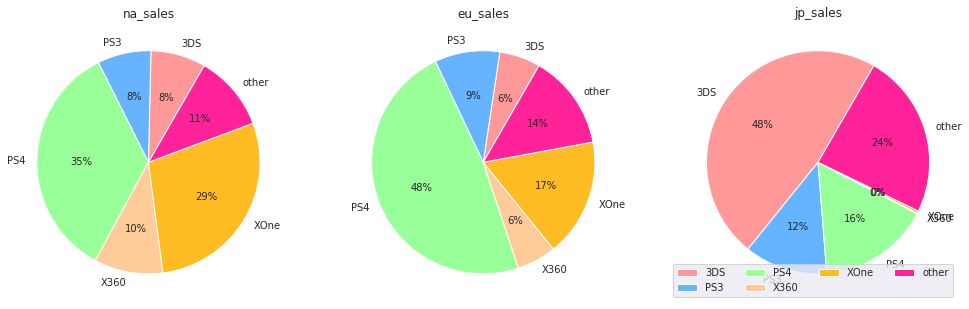

In [86]:
plt.figure(figsize=(17, 6))
for i, region in enumerate(region_sales):
    plt.subplot(1, 3, i + 1)
    sales_by_region = ds_good.pivot_table(
        index='platform_category',values = region, aggfunc='sum')
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffbb22', '#ff2299', '#66b8ff', '#ff7777', ]
    plt.pie(sales_by_region.values.flatten(), startangle=60, labels=sales_by_region.index, colors=colors,autopct='%1.0f%%')
    plt.title(region)
plt.legend(loc="lower right",ncol=4)
plt.show()

Conclusion on the distribution of popular platforms among countries

Interestingly, the demand for games in North America and Europe is similar. 

The first place is taken by PS4 with a big lead over other platforms by 6% or more. This love of Europeans to Sony can be explained by strong marketing campaign and the presence of good exclusives. Second is XOne as well outperforming the remaining platforms by 8% or more. The other platforms are in about the same demand. 

On the Japanese market we see a completely different distribution of users' priorities and the first place is taken by 3DS (48%), with Sony products coming in second and third. It is noteworthy that other games take almost a quarter of this sample. Such love for 3DS mobile platforms can be explained by cultural features and preferences of players.

### Top 3 Genres by Region NA, EU, JP

In [38]:
for reg_sale in region_sales:
    sales_by_region = ds_good.pivot_table(index='genre',values = reg_sale,aggfunc='sum').sort_values(by=reg_sale,ascending=False).head(3)
    print(sales_by_region)

         na_sales
genre            
Shooter     79.02
Action      72.53
Sports      46.13
         eu_sales
genre            
Action      74.68
Shooter     65.52
Sports      45.73
              jp_sales
genre                 
Role-Playing     31.16
Action           29.58
Fighting          6.37


In [39]:
top_genre = ["Platform", "Shooter","Sports","Role-Playing"]

def genre_category(row):
    genre = row['genre']
    
    if genre in top_genre:
        return genre
    else:
        return 'other'

ds_good['genre_category'] = ds_good.apply(genre_category, axis=1)

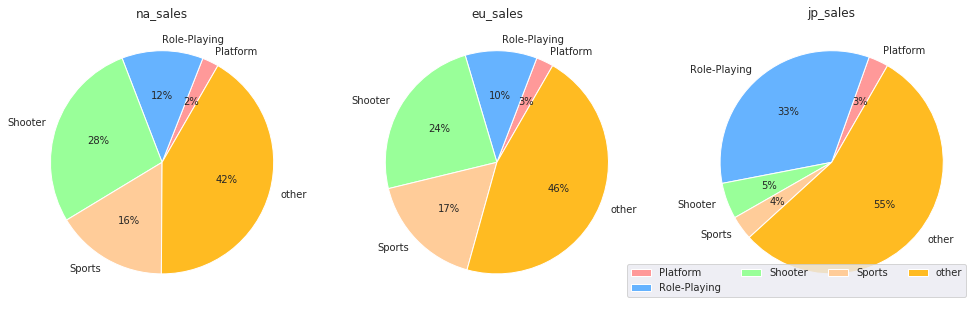

In [87]:
plt.figure(figsize=(17, 6))
for i, region in enumerate(region_sales):
    plt.subplot(1, 3, i + 1)
    sales_by_region = ds_good.pivot_table(
        index='genre_category',values = region, aggfunc='sum')
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffbb22', '#ff2299', '#66b8ff', '#ff7777', '#bb7777']
    plt.pie(sales_by_region.values.flatten(), startangle=60, labels=sales_by_region.index, colors=colors,autopct='%1.0f%%')
    plt.title(region)
plt.legend(loc="lower right",ncol=4)
plt.show()

Conclusion on the distribution of popular genres between countries:

Once again we can see that genre preferences between European and North American gamers are as close as possible to each other.

Japanese gamers have stood out with their choice of genres. Absolute leadership gets Role-Playing and it is not surprising, as the Japanese masters of games in this genre. In turn, the leader among the EU and NA here is only second place.

### Impact of ESRB rating by region

In [41]:
ds_good_esrb = (ds_good.loc[:,['na_sales','eu_sales','jp_sales','rating', 'total_sales']].query('rating != "Absent"'))
ds_good_esrb['rating'].unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

In [42]:
ds_good_esrb['rating'].fillna('n/a', inplace=True)
ds_good_esrb['rating'].unique()

array(['n/a', 'M', 'E', 'T', 'E10+'], dtype=object)

0 - «E» («Everyone») 

1 - «E10+» («Everyone 10 and older») 

2 - «T» («Teen»)

3 - «M» («Mature»)

4 - «n/a»

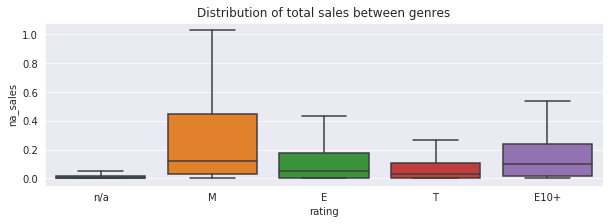

In [43]:
plt.figure(figsize = (10, 3))
ax = sns.boxplot(x="rating", y="na_sales", data=ds_good_esrb,showfliers = False)
plt.title('Distribution of total sales between genres');

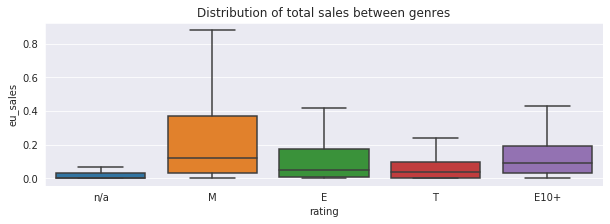

In [44]:
plt.figure(figsize = (10, 3))
ax = sns.boxplot(x="rating", y="eu_sales", data=ds_good_esrb,showfliers = False)
plt.title('Distribution of total sales between genres');

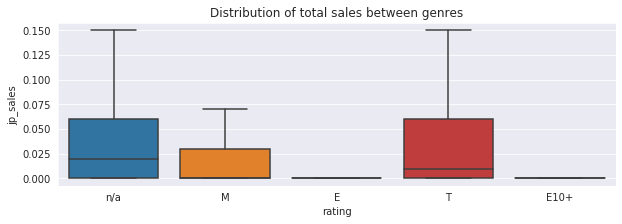

In [45]:
plt.figure(figsize = (10, 3))
ax = sns.boxplot(x="rating", y="jp_sales", data=ds_good_esrb,showfliers = False)
plt.title('Distribution of total sales between genres');

Conclusion on the impact of the ESRB on sales in different countries

As we can see from the scatter charts, games with a high age limit are the leaders in high sales in Europe and North America, which cannot be said about Japan, where gamers prefer games with no age limit, in addition, almost all the missing values gathered exactly in the Japanese data, which most likely means any age.

## Проверка гипотез

In [46]:
df_xone = df.query('platform == "XOne" and user_score > 0 and year_of_release >= 2014')
df_xone = df_xone['user_score']

df_pc = df.query('platform == "PC" and user_score > 0 and year_of_release >= 2014')
df_pc = df_pc['user_score']

df_action = df.query('genre == "Action" and user_score > 0 and year_of_release >= 2014')
df_action = df_action['user_score']

df_sports = df.query('genre == "Sports" and user_score > 0 and year_of_release >= 2014')
df_sports = df_sports['user_score']

**Test Hypothesis 1 - Average user ratings for Xbox One and PC platforms are the same**

H₀ - The average user ratings for Xbox One and PC platforms are equal

H₁ - The average user ratings on Xbox One and PC platforms are different

We use a two-sided T-test to test this, as the average can be shifted both to the right and to the left.

In [47]:
alpha = 0.05

results = st.ttest_ind(
    df_xone, 
    df_pc, 
    equal_var = True)

print('Average user rating Xone:{}'.format(math.ceil(df_xone.mean())))
print('Average user rating PC:{}'.format(math.ceil(df_pc.mean())))

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failing to reject the null hypothesis")

Средний пользовательский рейтинг Xone:7
Средний пользовательский рейтинг PC:7
p-значение: 0.0494928496978963
Отвергаем нулевую гипотезу


Conclusion:

Thus, rejecting the null hypothesis (we used p-value for comparison), we say that the differences in the mean between the samples are statistically significant with 5% probability.

**Hypothesis 2 - Average user ratings are different for the Action and Sports genres**.

H₀ - Average user ratings by genre Action и Sports are equal

H₁ - Average user ratings by genre  Action и Sports are diffrent

Using a two-sided T-test to check, since the average can be shifted both to the right and to the left.

In [48]:
alpha = 0.05

results = st.ttest_ind(
    df_action, 
    df_sports,
    equal_var = True)

print('Average user rating Action:{}'.format(math.ceil(df_action.mean())))
print('Average user rating Sports:{}'.format(math.ceil(df_sports.mean())))

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failing to reject the null hypothesis")

Средний пользовательский рейтинг Action:7
Средний пользовательский рейтинг Sports:6
p-значение: 1.4971792162188088e-20
Отвергаем нулевую гипотезу


Conclusion:

At a given level of statistical significance of 5%, we cannot reject the null hypothesis. Despite the differences in the mean, at a given level of statistical significance, we cannot say that these differences are not due to chance. 

## Overall conclusion and recommendations

Recommendations for choosing a successful game to sell:

The analysis identified the most promising platforms for sales planning for 2017: 


 1. The data for North America and Europe are almost identical. The best-selling platforms are PS4 and Xone. The no-prog option in terms of genres will be Shooter and Sports. It's better to bet on games with a high age limit.
 2. For Japan the picture is different. The most popular platform is 3DS. In the genres it is better to focus on the Role-playing. The age of the game is often not specified, so it is better to mark that the game is for all ages.